# Welcome to the tutorial on Color Models

---

### In this document, we'll talk about the following:
- What are color models?
- Convert betweeen different color models
- Color Slicing

## Color Models

A **Color Model** is a mathematical model describing the way colors can be represented as tuples of numbers, for example: triples in RGB or quadruples in CMYK. When this model is associated with a precise description of how the components are to be interpreted the resulting set of colors is called **color space**.  
Color spaces allows us to reproduce representations of color. Commons color spaces are:  
- RGB
- CMYK
- HSV
- HSL
- HSI

Different color spaces have different applications and they cover varying degree of the color spectrum. For example, **RGB** is often used for Plasma Display or LED display while **CMYK** is the standard in printing industry.
<img float="left" src="./Assets/chromaticity.png" style="width: 30%;" alt="Chromaticity Diagram">
<center>Figure 1: Chromaticity Diagram</center>



## Convert betweeen Color Models

To convert between the various Color Models we'll be using OpenCV. There are more than 150 color-space conversion methods available in OpenCV.  
Let's kick things off by importing OpenCV and Matplotlib.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Next we import a beautiful image of **Rubik's cube** using the `cv2.imread` function. You are free to use any image you like.

In [2]:
img = cv2.imread('./Assets/Rubiks_Cube.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Here we see the use of `cv2.cvtColor` we learnt in OpenCV tutorial. For a quick recap:

#### `cv2.cvtColor(src, code)`
This method is used to convert an image from one color space to another. We'll work with more color spaces later on.
##### Parameters
**src**: Source image, a numpy array.
**code**: It specifies the TO and FROM for the conversion of color space. It follows the pattern `sourceCode2destinationCode`.
##### Returns
This method returns the converted image as specified in the code.

##### Codes

Codes belong to the enumeration `cv::ColorConversionCodes`. Some of the several codes available are:

| Code           | `int` value | Result                                                                   |
| :------------- | :---------: | :----------------------------------------------------------------------- |
| COLOR_BGR2BGRA |      0      | Add alpha channel to RGB or BGR image                                    |
| COLOR_RGB2RGBA |      0      | Add alpha channel to RGB or BGR image                                    |
| COLOR_BGRA2BGR |      1      | Remove alpha channel from RGB or BGR image                               |
| COLOR_RGBA2RGB |      1      | Remove alpha channel from RGB or BGR image                               |
| COLOR_BGR2RGBA |      2      | Convert between RGB and BGR color spaces (with or without alpha channel) |
| COLOR_RGBA2BGR |      3      | Convert between RGB and BGR color spaces (with or without alpha channel) |
| COLOR_BGR2GRAY |      6      | Convert between BGR and grayscale                                        |
| COLOR_RGB2GRAY |      7      | Convert between RGB and grayscale                                        |
| COLOR_BGR2HSV  |     40      | Convert BGR to HSV (hue saturation value)                                |
| COLOR_RGB2HSV  |     41      | Convert RGB to HSV (hue saturation value)                                |

All codes have their reverse conversions too (RGBA**2**BGRA <-> BGRA**2**RGBA) which can be obtained easily by interchanging the sourceCode with the destinationCode as shown in the example above

The full list of codes and its corresponding details can be found by following [this link](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html)

---

`img` now holds a 3D numpy array. You can imagine this as three matrices, each for one corresponding channels of BGR. Each channel, a matrix further holds its corresponding pixels in rows and columns  
`img` holds the image in **BGR** format while `img_rgb` holds the image in **RGB** format

We can get the shape information of `img` using the `shape` property

In [3]:
img.shape

(1024, 983, 3)

Let's view the image we've just read using matplotlib

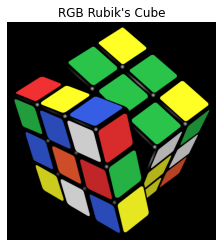

In [4]:
plt.imshow(img_rgb)
plt.axis("off")                  # Turns off the X and Y axes
plt.title("RGB Rubik's Cube")   # Gives a title to our plot
plt.show()

By default, OpenCV imports in **BGR** Color Model which stands for **B**lue, **G**reen, **R**ed. It is similar to the RGB Color Model. Some important properties of BGR are:
- It is an additive colorspace i.e. colors are obtained by a linear combination of Red, Green, and Blue values  
- The three channels are correlated by the amount of light hitting the surface.

Let's convert it to **HSV** Color Model which stands for **H**ue, **S**aturation and **V**alue and view the result
Let's also convert the BGR to RGB

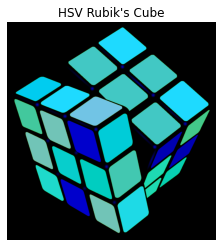

In [5]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)
plt.axis("off")                 # Turns off the X and Y axes
plt.title("HSV Rubik's Cube")   # Gives a title to our plot
plt.show()

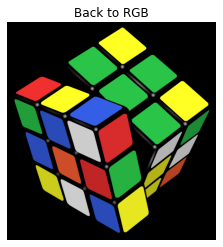

In [6]:
img_rgb_reverted = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb_reverted)
plt.axis("off")                # Turns off the X and Y axes
plt.title("Back to RGB")       # Gives a title to our plot
plt.show()

Let's take a look at how this image is displayed in various Color models  
*Note: The images shown below were made by using the `cv2.cvtColor` function*

| Color Space |    Code Used     | Image                                                         |
| :---------- | :--------------: | :-----------------------------------------------------------: |
| BGR         |        -         | <img src="./Assets/color_model_BGR.png" style="width: 40%;">  |
| RGB         | `COLOR_BGR2RGBA` | <img src="./Assets/color_model_RGB.png" style="width: 40%;">  |
| GRAYSCALE   | `COLOR_BGR2GRAY` | <img src="./Assets/color_model_GRAY.png" style="width: 20%;"> |
| CMY         |        -         | <img src="./Assets/color_model_CMY.png" style="width: 40%;">  |
| HSV         | `COLOR_BGR2HSV`  | <img src="./Assets/color_model_HSV.png" style="width: 40%;">  |
| HLS         | `COLOR_BGR2HLS`  | <img src="./Assets/color_model_HLS.png" style="width: 40%;">  |
| CIELuv      | `COLOR_BGR2Luv`  | <img src="./Assets/color_model_Luv.png" style="width: 40%;">  |

To see all the possible conversions and corresponding codes, follow [this link](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html).

### CMY Conversion
If you paid close atention, you might have noticed that CMY conversions are not included in the `cv2` colorspace conversion codes. To perform this conversion we need to calculate the values using NumPy arrays. We know that we can get CMY values by subracting RGB from the max value (1 for floats and 255 for ints).
Based on this let's take a look at the implementation.

In [7]:
def rgb2cmy(img):
    img_cmy = np.zeros(img.shape, dtype=np.uint8)
    
    img_cmy[:, :, 0] = 255 - img[:, :, 0]
    img_cmy[:, :, 1] = 255 - img[:, :, 1]
    img_cmy[:, :, 2] = 255 - img[:, :, 2]
    
    return img_cmy

img_cmy = rgb2cmy(img)

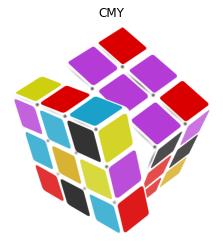

In [8]:
plt.imshow(img_cmy)
plt.axis("off")       # Turns off the X and Y axes
plt.title("CMY")      # Gives a title to our plot
plt.show()

The same function can be used to find the reverse too (i.e. CMY to RGB).

## Color Slicing


Color slicing is the process of extractiing certain channels from the given image.  
Let's try to split the original image to Red, Green and Blue.  

First we make three copies of the original image

In [9]:
red_Img = img_rgb.copy()
green_Img = img_rgb.copy()
blue_Img = img_rgb.copy()

Next we set certain channels to zero using Python's slice operators. Recall that by default image is imported in **BGR** but here we have considered the original image converted to **RGB** colorspace.

In [10]:
# set green and blue channels to 0
red_Img[:, :, 1] = 0
red_Img[:, :, 2] = 0

# set red and blue channels to 0
green_Img[:, :, 0] = 0
green_Img[:, :, 2] = 0

# set red and green channels to 0
blue_Img[:, :, 0] = 0
blue_Img[:, :, 1] = 0

Let's view our results now

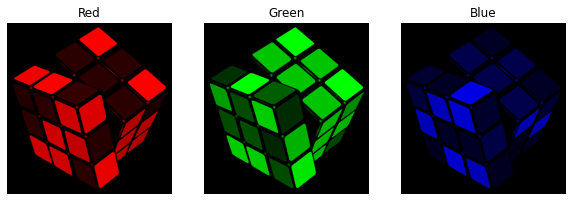

In [11]:
fig=plt.figure(figsize=(10,7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(red_Img, cmap="gray"); plt.axis('off'); plt.title("Red");

fig.add_subplot(rows, columns, 2)
plt.imshow(green_Img, cmap="gray"); plt.axis('off'); plt.title("Green");

fig.add_subplot(rows, columns, 3)
plt.imshow(blue_Img, cmap="gray"); plt.axis('off'); plt.title("Blue");

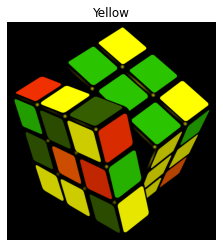

In [12]:
yellow_Img = img_rgb.copy()

# set blue channel to 0
yellow_Img[:, :, 2] = 0

plt.imshow(yellow_Img, cmap="gray"); plt.axis('off'); plt.title("Yellow");

Similarly we can split the channels of HSV to its components and view how its value varies in various situations.
We split the seperate channels to the corresponding variables and then display them in Grayscale to see how their values vary.

In [13]:
hue_Img = img_hsv[:, :, 0]
sat_Img = img_hsv[:, :, 1]
value_Img = img_hsv[:, :, 2]

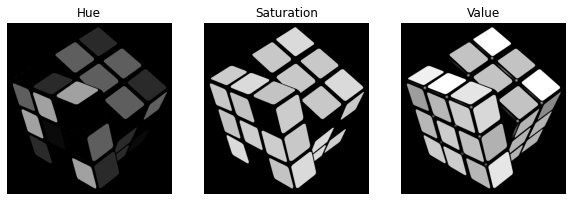

In [14]:
fig=plt.figure(figsize=(10,7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(hue_Img, cmap="gray"); plt.axis('off'); plt.title("Hue")

fig.add_subplot(rows, columns, 2)
plt.imshow(sat_Img, cmap="gray"); plt.axis('off'); plt.title("Saturation")

fig.add_subplot(rows, columns, 3)
plt.imshow(value_Img, cmap="gray"); plt.axis('off'); plt.title("Value");

We can also take a look at values for individual pixels in an RGB image and its converted HSV counterpart.  

In [15]:
x = 455
y = 455
window_size = 15
rgb_window = img_rgb[x:x+window_size, y:y+window_size, :]
hsv_window = img_hsv[x:x+window_size, y:y+window_size, :]

print("RGB Image Window:")
print("Red:\n",rgb_window[:, :, 0])
print("Blue:\n",rgb_window[:, :, 1])
print("Green:\n",rgb_window[:, :, 2])
print("\n=================================\n")
print("HSV Image Window:")
print("Hue:\n",hsv_window[:, :, 0])
print("Saturation:\n",hsv_window[:, :, 1])
print("Value:\n",hsv_window[:, :, 2])

RGB Image Window:
Red:
 [[53 53 53 53 53 53 53 53 53 53 53 52 28  1  0]
 [53 53 53 53 53 53 53 53 53 53 44 11  0  0  0]
 [53 53 53 53 53 53 53 53 52 28  1  0  0  0  0]
 [53 53 53 53 53 53 53 44 11  0  0  0  0  0  0]
 [53 53 53 53 53 53 32  2  0  0  0  0  0  0  0]
 [53 53 53 53 46 13  0  0  0  0  0  0  0  0  0]
 [53 53 53 32  2  0  0  0  0  0  0  0  0  0  0]
 [53 46 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [32  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
Blue:
 [[94 94 94 94 94 94 94 94 94 94 94 93 50  3  0]
 [94 94 94 94 94 94 94 94 94 94 78 20  0  0  0]
 [94 94 94 94 94 94 94 94 93 50  3  0  0  0  0]
 [94 94 94 94 94 94 94 79 20  0  0  0  0  0  0]
 [94 94 94 94 94 93 56  4  0  0  0  0  0  0  0]
 [94 94 

## References

| Figures                        | Reference                                                  |
| :----------------------------- | :--------------------------------------------------------- |
| Figure 1: Chromaticity Diagram | https://commons.wikimedia.org/w/index.php?curid=32158329   |
| Rubik's Cube                  | https://commons.wikimedia.org/wiki/File:Rubik%27s_cube.svg |

| Links               | Reference                                                                     |
| :------------------ | :---------------------------------------------------------------------------- |
| Color convert Codes | https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html |